In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

- Below are plots made from the results obtained during training and testing of both MLP and SVM.

# Import Data - SVM:

## Basic Gridsearch - No Sampling Techniques Used:

In [3]:
svm_gs = pd.read_csv('Data/SVM_Gridsearch_Results.csv')

In [24]:
svm_gs.sort_values(by = 'mean_score', ascending=False).head(5)

,name,mean_score,mean_fit_time,param_C,param_gamma
66,rbf,0.819836,213.773285,108.922825,0.987901
67,rbf,0.816050,208.640711,106.959446,0.851896
60,rbf,0.812801,226.951448,177.991492,0.610313
40,poly,0.811768,4074.293481,183.404385,1.010411
62,rbf,0.811360,185.002533,74.745104,0.829911


In [235]:
svm_gs.mean_fit_time.mean()

330.53086384625

## Gridsearch Values - Sampling Techniques:

In [142]:
svm_samp_gs = pd.read_csv('Data/SVM_Gridsearch_Sampling_Results.csv')

In [145]:
svm_samp_gs.sort_values(by = 'mean_test_score', ascending=False).head(5)

,mean_test_score,mean_fit_time,C,Gamma,tomek,under_strat,over_strat
0,0.926540,304.765204,142.452992,1.005504,TL,-15%,SMOTE
1,0.920481,388.256793,268.301587,0.782780,No TL,-15%,SMOTE
2,0.915996,139.882393,92.085811,1.079928,TL,-40%,SMOTE
3,0.914451,190.281968,112.736727,0.754321,TL,-25%,SMOTE
4,0.913354,128.682077,88.801957,1.003014,TL,-40%,SMOTE


# Surface Plots:

## No Sampling Techniques:

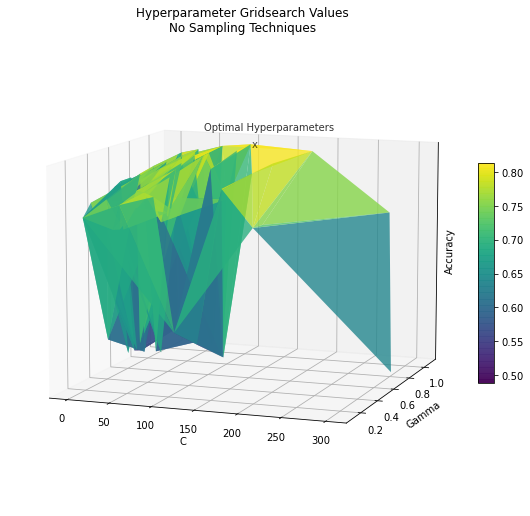

In [234]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

surf = ax.plot_trisurf(svm_gs.param_C, 
                svm_gs.param_gamma, 
                svm_gs.mean_score, 
                cmap='viridis', edgecolor='none', linewidth=0.2, alpha=0.8)

ax.text(x=110, y=0.99, z=0.815, s='x', alpha =0.7, color='black')
ax.text(x=50, y=0.99, z=0.84, s='Optimal Hyperparameters', color='black', alpha =0.8)

fig.colorbar( surf, shrink=0.4, aspect=14, pad = 0)

ax.set_title('Hyperparameter Gridsearch Values\nNo Sampling Techniques')
ax.view_init(10, -70)
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Accuracy', labelpad = -12)
ax.set_zticks([])

plt.tight_layout()
#plt.savefig('Figures/GS_Params_No_Samp.png', bbox_inches='tight')
plt.show()

## Sampling Techniques:

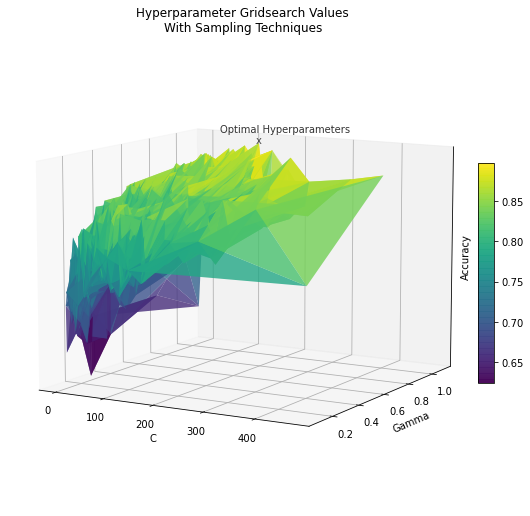

In [249]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

surf = ax.plot_trisurf(svm_samp_gs.C, 
                svm_samp_gs.Gamma, 
                svm_samp_gs.mean_test_score, 
                cmap='viridis', edgecolor='none', linewidth=0.2, alpha=0.8)

ax.text(x=138, y=1, z=0.926, s='x', alpha=0.7, color='black')
ax.text(x=60, y=1, z=0.94, s='Optimal Hyperparameters', color='black', alpha=0.8)

fig.colorbar( surf, shrink=0.4, aspect=14, pad = 0)

ax.set_title('Hyperparameter Gridsearch Values\nWith Sampling Techniques')
ax.view_init(10, -60)
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Accuracy', labelpad = -12)
ax.set_zticks([])

plt.tight_layout()
#plt.savefig('Figures/GS_Params_Samp.png', bbox_inches='tight')
plt.show()

# Time and Accuracy Comparisons - SVM:

In [58]:
# Importing the linear SVC results:
lin_SVC = pd.read_csv('Data/SVM_LinearSVC_Results.csv')
lin_SVC['name'] = 'linear (liblinear)'

In [59]:
# Getting the mean accuracy and fit time per kernel type from the gridsearch results:
time_acc_df = svm_gs.groupby('name')[['mean_score', 'mean_fit_time']].mean().reset_index()

In [60]:
# Extracting similar metrics from the linear SVC Results:
lin_svc_df = lin_SVC.groupby('name')[['mean_score', 'mean_fit_time']].mean().reset_index()

In [79]:
kernels_acc_time = pd.concat([time_acc_df, lin_svc_df])

In [80]:
kernels_acc_time.replace({"linear": "linear (libsvm)"}, inplace=True)

In [123]:
kernels_acc_time = kernels_acc_time.round(3)
kernels_acc_time = kernels_acc_time.sort_values(by = 'mean_fit_time')
kernels_acc_time

,name,mean_score,mean_fit_time
0,linear (liblinear),0.702,35.108
2,rbf,0.798,167.815
3,sigmoid,0.497,178.654
0,linear (libsvm),0.725,269.036
1,poly,0.788,706.618


## Plotting:

In [104]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False

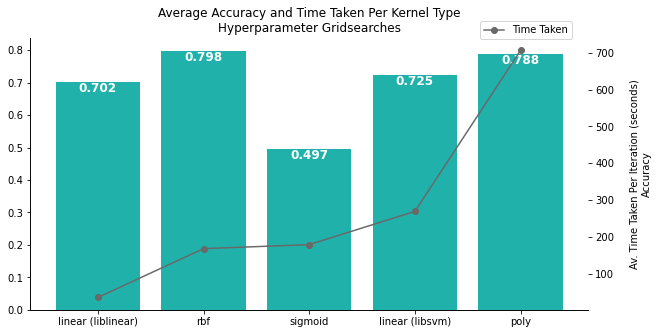

In [347]:
plt.figure(figsize=(10,5))

barchart = plt.bar(kernels_acc_time.name, kernels_acc_time.mean_score, 
                   color='lightseagreen', tick_label ="Acc")

# Annotating count number above bars:
for j, val in enumerate(kernels_acc_time.mean_score):
    plt.text(j, val, f'{val:,}', horizontalalignment='center', verticalalignment='top', 
             fontdict={'fontweight':700, 'size':12}, c= 'white')
    
plt.twinx()
linechart = plt.plot(kernels_acc_time.name, kernels_acc_time.mean_fit_time, color='dimgrey', 
                     marker = 'o', label = 'Time Taken')

plt.title("Average Accuracy and Time Taken Per Kernel Type\nHyperparameter Gridsearches")
plt.ylabel("\nAv. Time Taken Per Iteration (seconds)\nAccuracy")
plt.legend(loc = 'upper right', bbox_to_anchor=(0.98, 1.08))
#plt.savefig('Figures/Time_vs_acc_chart.png', bbox_inches='tight')
plt.show()

# Import Data - MLP:

In [275]:
mlp_gs = pd.read_csv('Data/MLP_ALL_Gridsearch_Results.csv')

In [276]:
mlp_gs.sort_values(by = 'av_val_loss').head(5)

,activ,av_val_loss,drop_out,max_neurons,learn_rate,momentum,time_taken,av_epochs,cv_1_val_loss,cv_2_val_loss,cv_3_val_loss,cv_4_val_loss
14,LeRelu,0.198710,0.0,512,0.100,0.9,3144.156250,16.75,0.273545,0.196833,0.190907,0.133555
26,LeRelu,0.200325,0.0,512,0.100,0.0,3510.125000,18.75,0.243073,0.189681,0.218731,0.149817
200,Relu,0.202541,0.0,256,0.100,0.0,1350.218750,13.50,0.214562,0.249921,0.207319,0.138361
281,Relu,0.215059,0.1,512,0.001,0.0,2145.218750,13.00,0.261349,0.211610,0.192072,0.195204
280,Relu,0.218180,0.0,512,0.001,0.0,1963.578125,12.25,0.384020,0.252102,0.133149,0.103451


In [254]:
def prep_to_plot(x, y, z, data):
    df = data.groupby([x, y])[z].mean().reset_index()
    
    x1 = np.reshape(df[x].to_list(), (df.iloc[:, 0].nunique(), df.iloc[:, 1].nunique()))
    y1 = np.reshape(df[y].to_list(), (df.iloc[:, 0].nunique(), df.iloc[:, 1].nunique()))
    z1 = np.reshape(df[z].to_list(), (df.iloc[:, 0].nunique(), df.iloc[:, 1].nunique()))
    
    return x1, y1, z1

In [259]:
x = np.reshape(do_mn.drop_out.to_list(), (4, 4))
y = np.reshape(do_mn.max_neurons.to_list(), (4, 4))
z = np.reshape(do_mn.av_val_loss.to_list(), (4, 4))

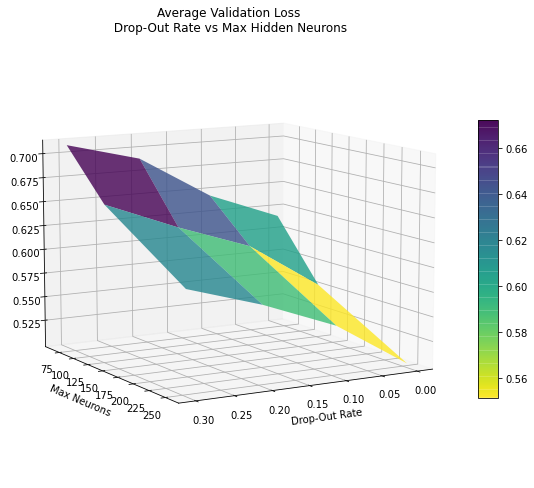

In [149]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(x, y, z, 
                cmap='viridis_r', edgecolor='none', linewidth=0.2, alpha=0.8)

fig.colorbar( surf, shrink=0.5, aspect=14)

ax.set_title('Average Validation Loss\n Drop-Out Rate vs Max Hidden Neurons')
ax.view_init(10, 60)
ax.set_xlabel('Drop-Out Rate')
ax.set_ylabel('Max Neurons')
#ax.set_zlim(top=1.1)
    
plt.tight_layout()
plt.show()

## Momentum & Learning Rate:

In [313]:
mo_lr = mlp_gs.groupby(['momentum', 'learn_rate'])['av_val_loss'].mean().reset_index()

In [264]:
x1, y1, z1 = prep_to_plot('momentum', 'learn_rate', 'av_val_loss', mlp_gs)

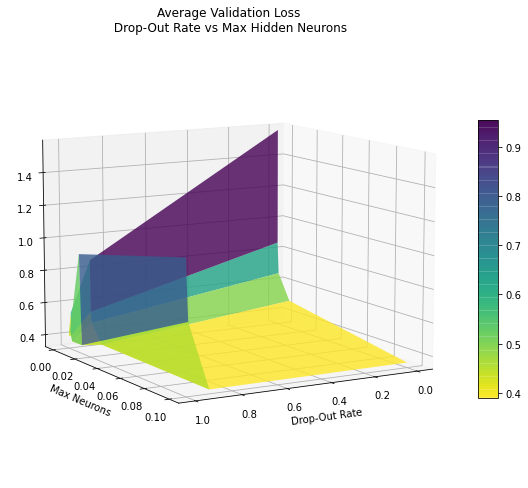

In [266]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(x1, y1, z1, 
                cmap='viridis_r', edgecolor='none', linewidth=0.2, alpha=0.8)

fig.colorbar( surf, shrink=0.5, aspect=14)

ax.set_title('Average Validation Loss\n Drop-Out Rate vs Max Hidden Neurons')
ax.view_init(10, 60)
ax.set_xlabel('Drop-Out Rate')
ax.set_ylabel('Max Neurons')
#ax.set_zlim(top=1.1)
    
plt.tight_layout()
plt.show()

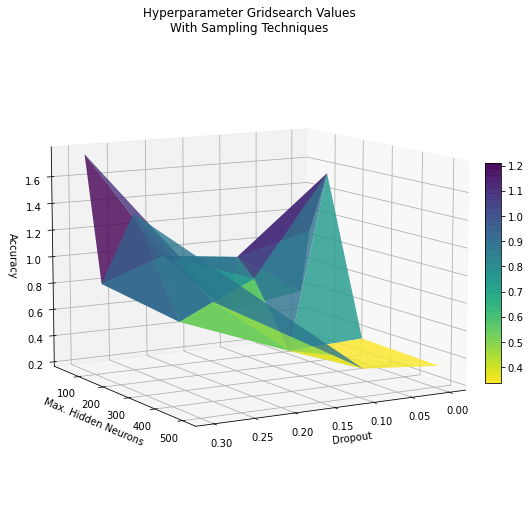

In [310]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

surf = ax.plot_trisurf(mlp_gs.drop_out, 
                mlp_gs.max_neurons, 
                mlp_gs.av_val_loss, 
                cmap='viridis_r', edgecolor='none', linewidth=0.2, alpha=0.8)

#ax.text(x=138, y=1, z=0.926, s='x', alpha=0.7, color='black')
#ax.text(x=60, y=1, z=0.94, s='Optimal Hyperparameters', color='black', alpha=0.8)

fig.colorbar( surf, shrink=0.4, aspect=14, pad = 0)

ax.set_title('Hyperparameter Gridsearch Values\nWith Sampling Techniques')
ax.view_init(10, 60)
ax.set_xlabel('Dropout')
ax.set_ylabel('Max. Hidden Neurons')
ax.set_zlabel('Accuracy')
#ax.set_zticks([])

plt.tight_layout()
#plt.savefig('Figures/GS_Params_Samp.png', bbox_inches='tight')
plt.show()

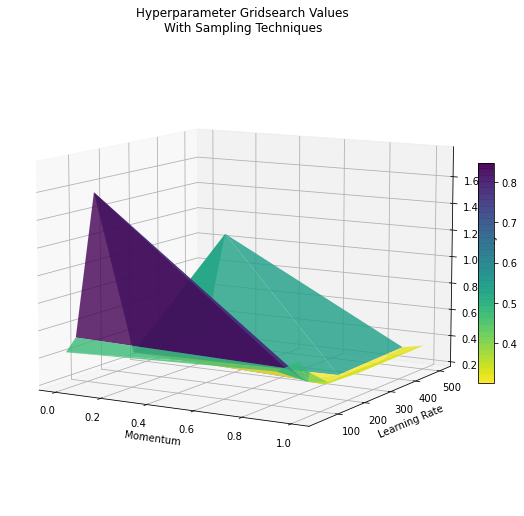

In [307]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

surf = ax.plot_trisurf(mlp_gs.momentum, 
                mlp_gs.max_neurons, 
                mlp_gs.av_val_loss, 
                cmap='viridis_r', edgecolor='none', linewidth=0.2, alpha=0.8)

#ax.text(x=138, y=1, z=0.926, s='x', alpha=0.7, color='black')
#ax.text(x=60, y=1, z=0.94, s='Optimal Hyperparameters', color='black', alpha=0.8)

fig.colorbar( surf, shrink=0.4, aspect=14, pad = 0)

ax.set_title('Hyperparameter Gridsearch Values\nWith Sampling Techniques')
ax.view_init(10, -60)
ax.set_xlabel('Momentum')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Accuracy')
#ax.set_zticks([])

plt.tight_layout()
#plt.savefig('Figures/GS_Params_Samp.png', bbox_inches='tight')
plt.show()

# Times to Train:

In [5]:
train_times = pd.read_csv('Data/Times_to_train.csv')

In [379]:
train_times

,Classifier,Type,train_data_size,train_time,predict_time,accuracy,supp_vectors
0,SVM,Original,"46,481",5.91,1.8900,83.12,NaN
1,SVM,Original,"116,202",22.80,4.5500,84.58,NaN
2,SVM,Original,"232,405",95.71,8.6200,85.59,NaN
3,SVM,Original,"464,809",373.40,17.0300,86.52,"171,451"
4,SVM,Sampled,"1,320,256",635.25,28.7800,85.31,"292,138"
5,MLP,Original,"46,481",6.53,NaN,NaN,NaN
6,MLP,Original,"116,202",12.65,NaN,NaN,NaN
7,MLP,Original,"232,405",32.60,NaN,NaN,NaN
8,MLP,Original,"464,809",65.48,0.0395,NaN,NaN
9,MLP,Sampled,"1,320,256",112.40,0.0437,NaN,NaN


In [6]:
mpl.rcParams['axes.spines.right'] = False

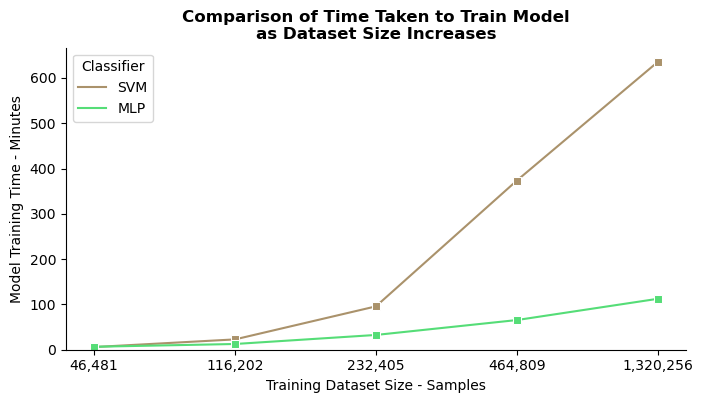

In [383]:
plt.figure(figsize=(8,4), dpi=100)

sns.lineplot(data = train_times, x = "train_data_size", y = "train_time", hue='Classifier', marker = 's', palette = 'terrain_r')

plt.xlabel("Training Dataset Size - Samples")
plt.ylabel("Model Training Time - Minutes")
plt.ylim(0)

plt.title("Comparison of Time Taken to Train Model\nas Dataset Size Increases", fontweight='bold')
plt.savefig('Figures/Training_Time_w_Size_Chart.png', bbox_inches='tight')
plt.show()

# Training and Validation Loss - MLP Model:

In [2]:
mlp_losses = pd.read_csv('Data/mlp_100sampled_epochs_df.csv')

In [3]:
mlp_losses.head()

,Epoch,Train Loss,Train Accuracy,Validation Loss,Validation Accuracy
0,0,0.452148,81.684772,0.331067,87.861267
1,1,0.300261,88.214039,0.277085,89.017342
2,2,0.252977,90.156516,0.151894,94.219658
3,3,0.224998,91.277793,0.207981,93.063583
4,4,0.206589,92.032505,0.218267,93.641624


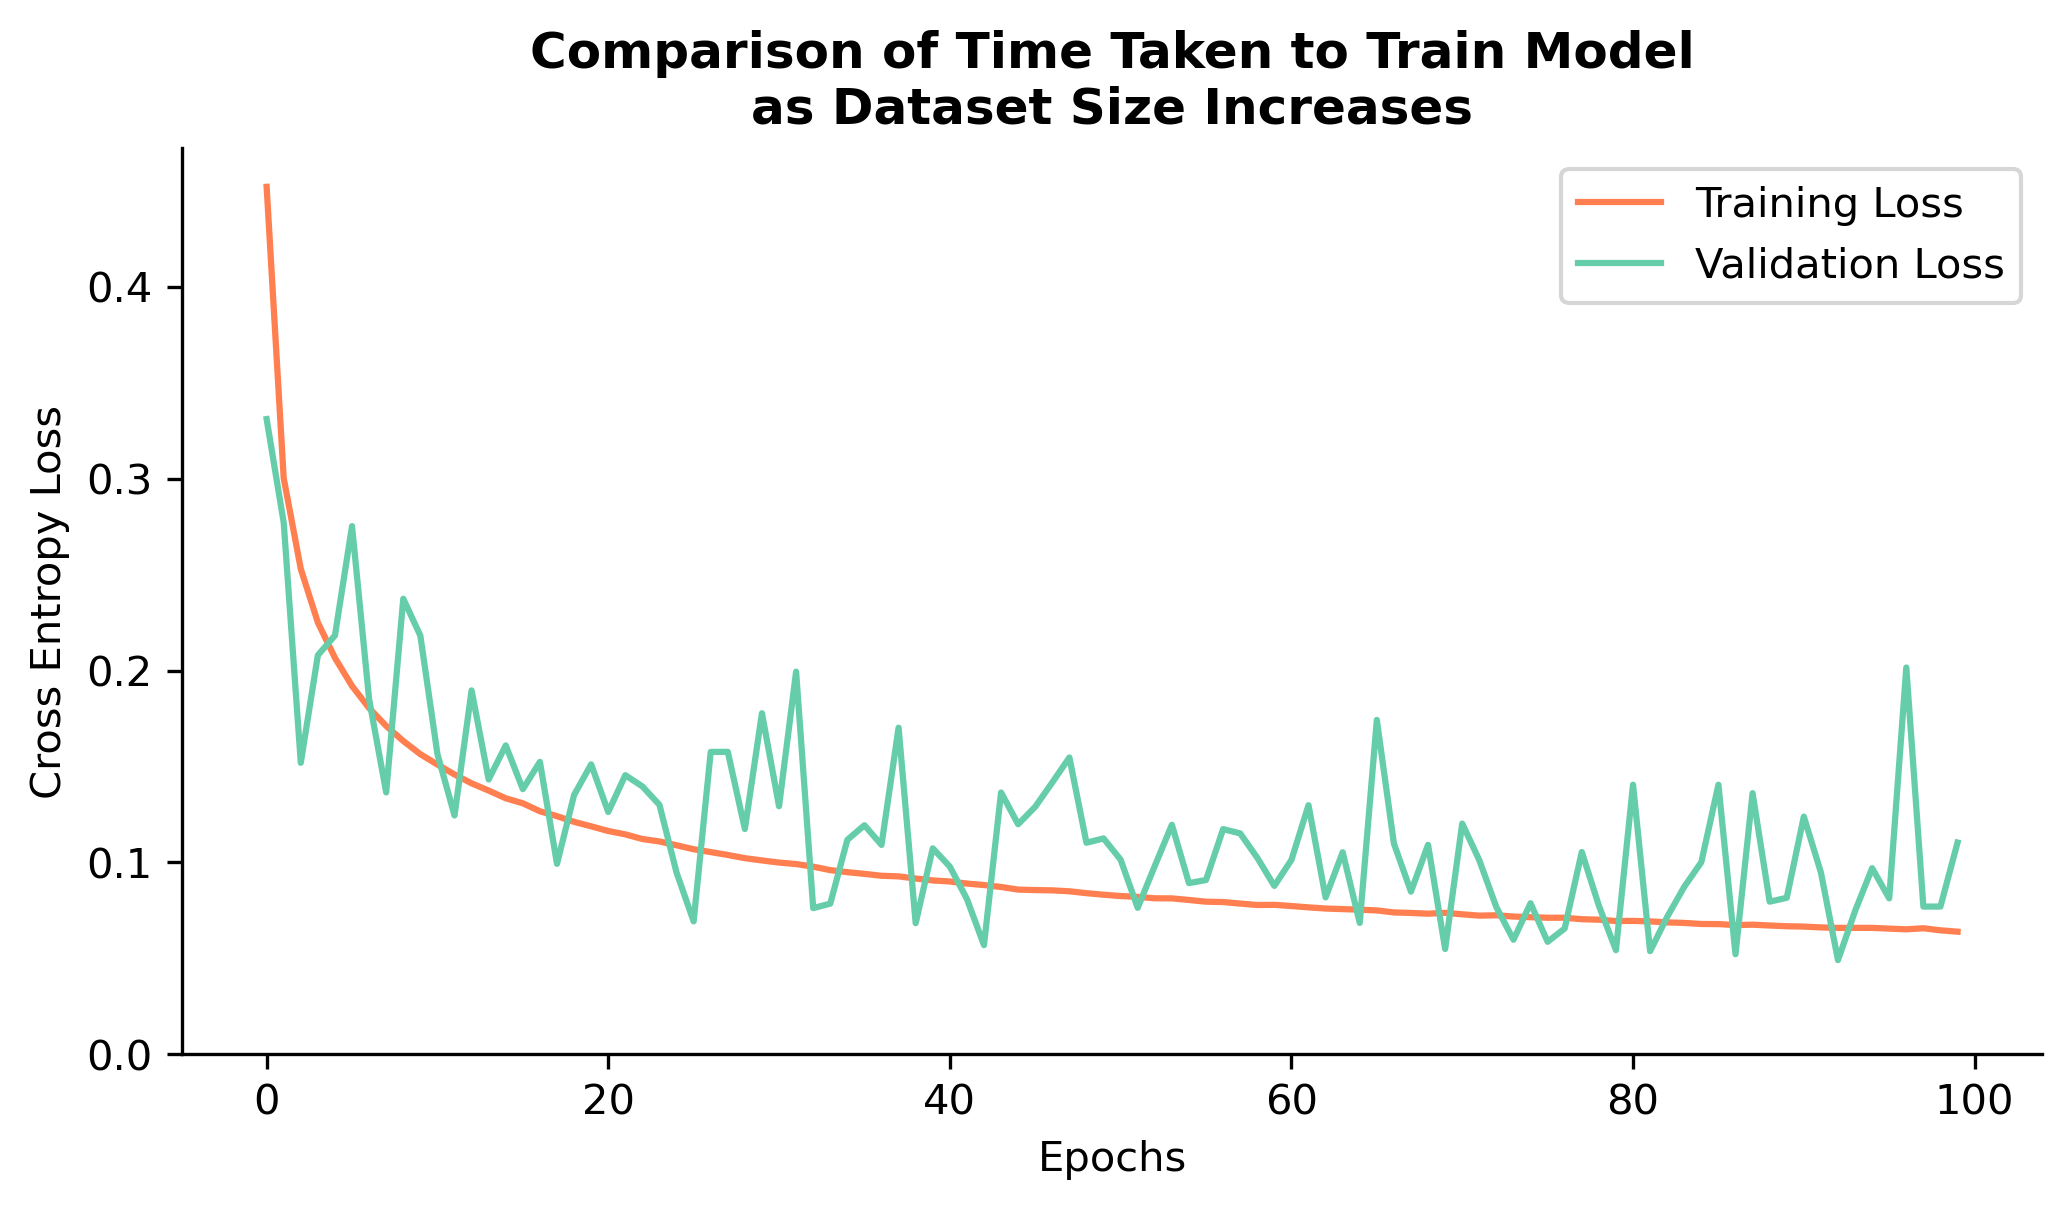

In [377]:
plt.figure(figsize=(8,4), dpi=300)

sns.lineplot(data = mlp_losses, x = "Epoch", y = "Train Loss", color = 'coral', label = "Training Loss")
sns.lineplot(data = mlp_losses, x = "Epoch", y = "Validation Loss", color = 'mediumaquamarine', label = "Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.ylim(0)

plt.title("Comparison of Time Taken to Train Model\nas Dataset Size Increases", fontweight='bold')
plt.legend()
plt.savefig('Figures/Training_Time_Chart.png', bbox_inches='tight')
plt.show()